## Drill: Unit1 Intermediate Visualization

### Drills
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

- Choose one variable and plot that variable four different ways.
- Choose two continuous variables, and plot them three different ways.
- Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

### Challenge
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.


# Drills

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
exercise = sns.load_dataset("exercise")
titanic = sns.load_dataset("titanic")
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")
planets = sns.load_dataset("planets")

### Choose one variable and plot that variable four different ways.

1. barplot
2. pointplot
3. boxplot
4. violin plot

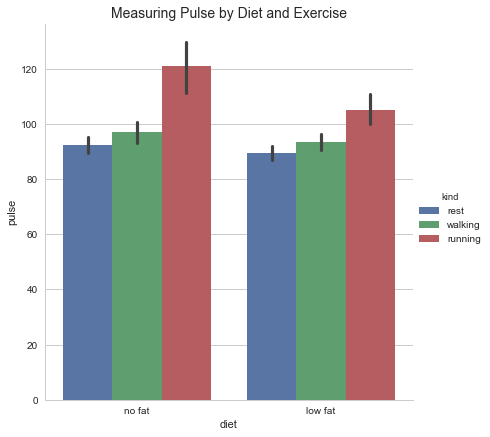

In [8]:
sns.set(style="whitegrid")
x = "diet"
y = "pulse"
hue = "kind"
data = exercise

g = sns.factorplot(x, y, hue, data, size=6, kind="bar", ci=95)
plt.title("Measuring Pulse by Diet and Exercise", fontsize=14)
plt.show()

**Bar plot**

The barplot plots the mean of the pulse in resting position, while walking and while running, categorized by no fat diet and low fat diet. 

**Pros:** clear visualization of pulse rates in three kinds of exercise

**Cons:** The highest pulse rate is achieved in running while on no fat diet. This is also the with the largest error bar showing maximum variance.
- bars take up too much space


Text(0.5,1,'Measuring Pulse by Diet and Exercise kind')

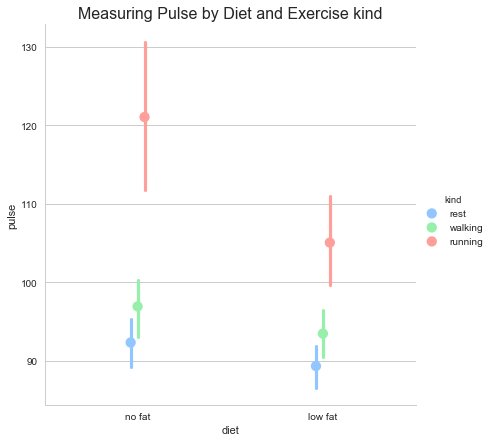

In [11]:
g = sns.factorplot(x, y, hue, data, size=6, kind="point", 
                   palette="pastel", ci=95, dodge=True, join=False)
plt.title("Measuring Pulse by Diet and Exercise kind", fontsize=16, loc="center")

**Point plot**

**Pros:** 
- range of variance is easily visualized with the error bars
- takes up less space than bar plot
- the differences in the mean (shown by the dots) are more informative for visually comparing the differences. For example, the difference of the pulse rates in the no fat and low fat diets for running are much explicit in the point plot. 

**Cons:** 
- Doesn't have to start from zero, and therefore the actual differences seem more drastic. This information could be used to show relations between the categories. 


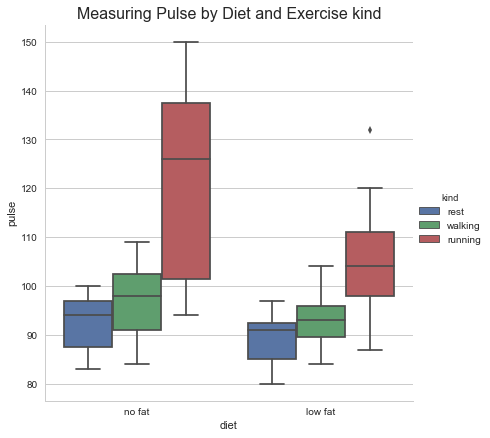

In [17]:
sns.set(style="whitegrid")
x = "diet"
y = "pulse"
hue = "kind"
data = exercise

g = sns.factorplot(x, y, hue, data, kind="box", size=6)

plt.title('Measuring Pulse by Diet and Exercise kind',
         fontsize=16)
plt.show()

**Box Plot**

Box plots provide more information that the barplots or the point plots. The whiskers show the minimum and the maximum values. The box is demarcated by the first quartile and the third quartile (the interquartile range) along with the median as the line in the middle. 

**Pros:** 
- shows a greater range of information
- better outlier detection, ±3IQR is considered outliers and are represented by dots in the plot. Suspected outliers have values ±1.5IQR.

**Cons:**
- The rectangular boxes doesn't show the distribution of actual values



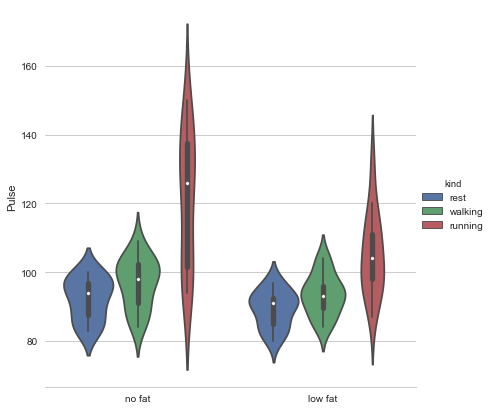

In [12]:
g = sns.factorplot(x, y, hue, data, size=6, kind="violin")

(g.despine(left=True)
    .set_ylabels("Pulse")
    .set_xlabels(""))


**Violin Plot**

Violin plots are similar to boxplots except it shows the distribution of values. The box and the whiskers are shown within the violin plots. 

**Pros:** 
- uses kernel density estimation, a non-parametric approach of probability density estimation that has been proven to be more useful for smoothing


**Cons:**
- Needs tweaking as kde is involved. 


### Choose two continuous variables, and plot them three different ways.

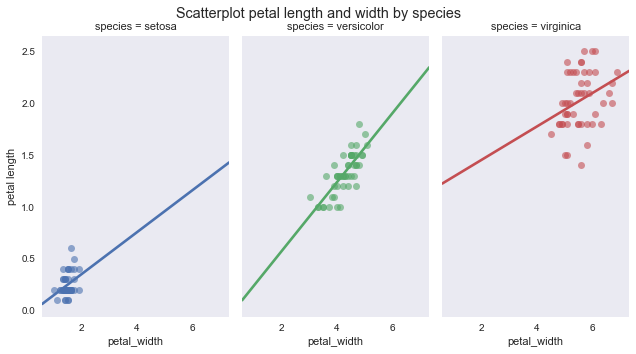

In [46]:
sns.set(style="dark")

x='petal_width'
y='petal_length'
 
g = sns.lmplot(y, x, hue='species',
               size=5,
               aspect=.6,
               data=iris, # Data.
               col='species',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.6}
              )
(g.set_ylabels("petal length")
    .set_xlabels("petal_width")
    .despine(left=True))
plt.suptitle('Scatterplot petal length and width by species')
plt.subplots_adjust(top=0.9)
plt.show()

**Scatterplot with or without linear model fit**

Two continuous variables for showing correlations. A linear model could be fit, and it represented by the line. lmplots are similar to facetgrid, such that it makes data segregation easy. In the plot above, the subplots are divided in terms of species and each plot represents the correlation between the petal length and petal width. 

**Pros:**

- great way of showing the correlation between the two independent variables. 

**Cons:**
- Not sure

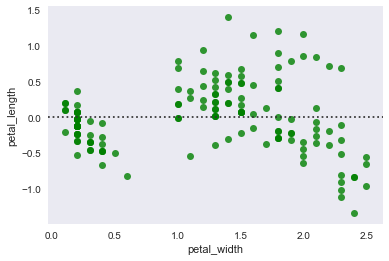

In [47]:
sns.residplot(x, y, data=iris, lowess=False, color="g")

**Residual plot**

Plot the residuals of a linear regression 



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


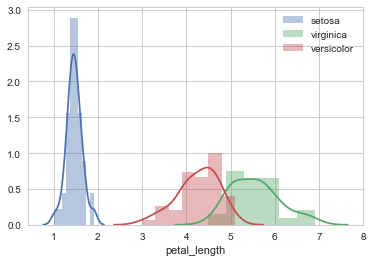

In [18]:
sns.distplot(iris[iris['species'] == "setosa"].petal_length)
sns.distplot(iris[iris['species'] == "virginica"].petal_length)
sns.distplot(iris[iris['species'] == "versicolor"].petal_length)
plt.legend(['setosa', 'virginica', 'versicolor'])
plt.show()


**distplot**

Histogram with kde estimation shown as a line

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


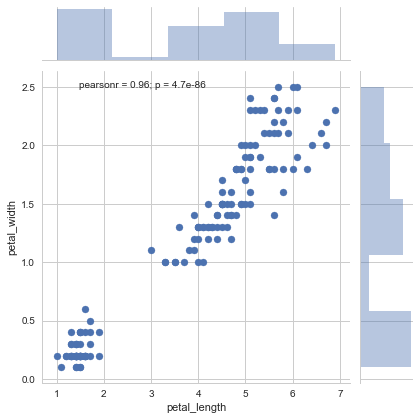

In [19]:
sns.jointplot(x="petal_length", y='petal_width', data=iris)

In [4]:
print(titanic.head(20))

    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
5          0       3    male   NaN      0      0   8.4583        Q   Third   
6          0       1    male  54.0      0      0  51.8625        S   First   
7          0       3    male   2.0      3      1  21.0750        S   Third   
8          1       3  female  27.0      0      2  11.1333        S   Third   
9          1       2  female  14.0      1      0  30.0708        C  Second   
10         1       3  female   4.0      1      1  16.7000        S   Third   
11         1       1  female  58.0      0      0  26.5500       

[Text(0,0.5,'age'), Text(0.5,0,'')]

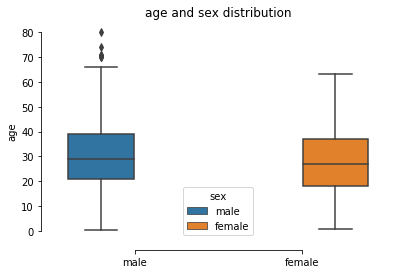

In [5]:
# Comparing groups using boxplots.
ax = sns.boxplot(x='sex',y='age',hue='sex',data=titanic)  
plt.title('age and sex distribution')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='age')


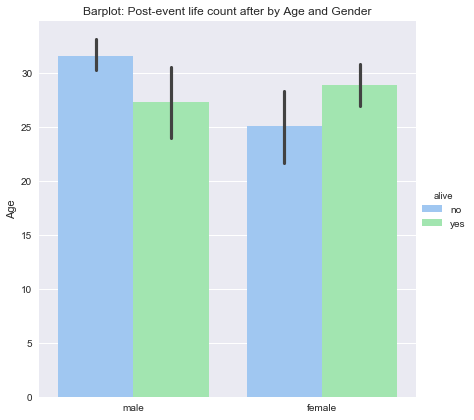

In [6]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x="sex", y="age", hue="alive", data=titanic,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Barplot: Post-event life count after by Age and Gender')
plt.show()

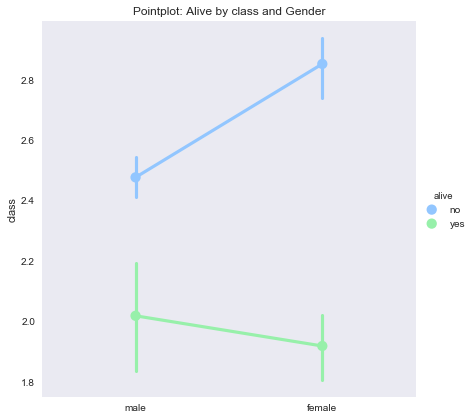

In [7]:
sns.set(style='dark')
g = sns.factorplot(x="sex", y="pclass", hue="alive", data=titanic, size=6, kind="point", palette="pastel", ci=95)

g.despine(left=True)
g.set_xlabels("")
g.set_ylabels("class")
plt.title("Pointplot: Alive by class and Gender")
plt.show()

